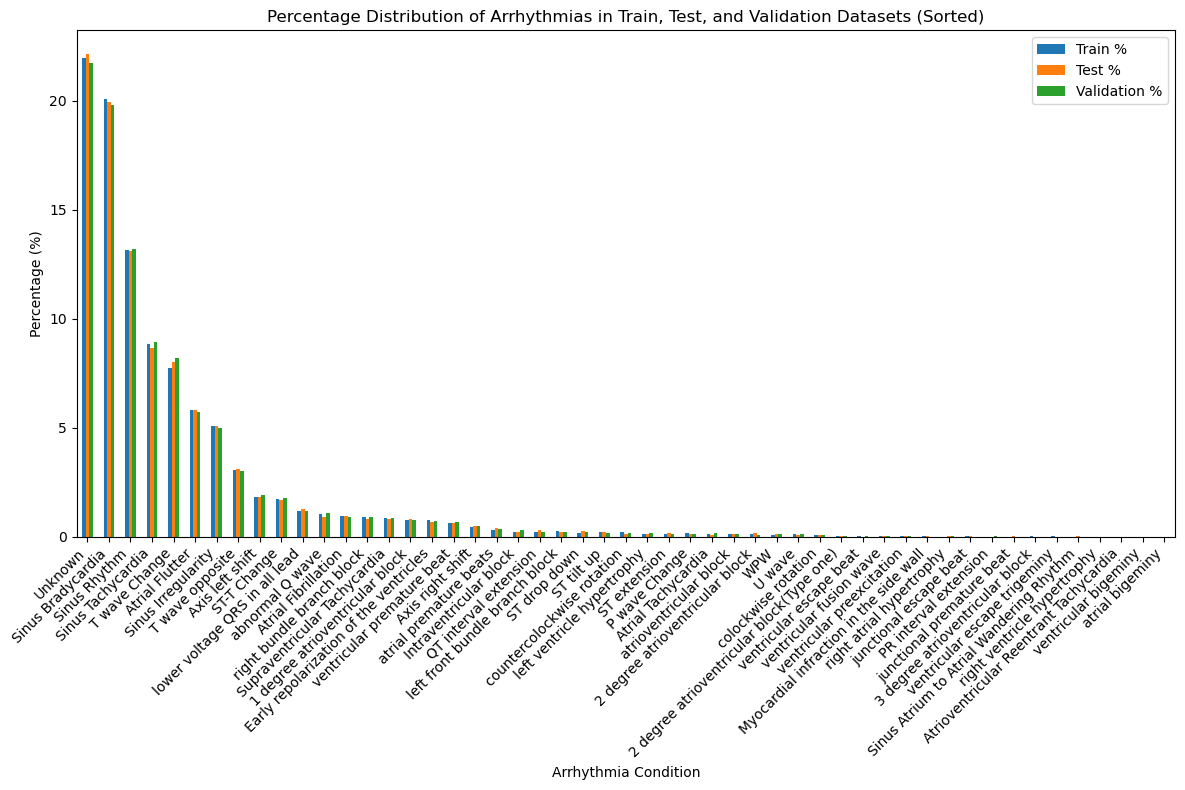

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv(f'/Users/matildacotton/Desktop/semester_2_2024/topics/data/training-hctsa-catch22-features-lead-0.csv')
test_df = pd.read_csv(f'/Users/matildacotton/Desktop/semester_2_2024/topics/data/test-features/testing-hctsa-catch22-features-lead-0.csv')
val_df = pd.read_csv(f'/Users/matildacotton/Desktop/semester_2_2024/topics/data/validating-hctsa-catch22-features-lead-0.csv')

# Replace "Normal" with "Unknown" in the 'Condition' column for all datasets
train_df['Condition'] = train_df['Condition'].replace("Normal", "Unknown")
test_df['Condition'] = test_df['Condition'].replace("Normal", "Unknown")
val_df['Condition'] = val_df['Condition'].replace("Normal", "Unknown")

# Count occurrences of each condition in the datasets
train_counts = train_df['Condition'].value_counts(normalize=True) * 100  # Convert to percentages
test_counts = test_df['Condition'].value_counts(normalize=True) * 100   # Convert to percentages
val_counts = val_df['Condition'].value_counts(normalize=True) * 100     # Convert to percentages

# Combine the percentages into a single DataFrame for plotting
df_combined = pd.DataFrame({
    'Train %': train_counts,
    'Test %': test_counts,
    'Validation %': val_counts
}).fillna(0)  # Fill NaN with 0 for missing values in any dataset

# Sort the DataFrame by the total percentage across datasets (high to low)
df_combined['Total %'] = df_combined.sum(axis=1)
df_combined = df_combined.sort_values(by='Total %', ascending=False)

# Drop the 'Total %' column before plotting (optional)
df_combined = df_combined.drop(columns='Total %')

# Plot the percentage distribution of arrhythmias across datasets
df_combined.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Percentage Distribution of Arrhythmias in Train, Test, and Validation Datasets (Sorted)')
plt.xlabel('Arrhythmia Condition')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


Results for Lead 0
Accuracy: 0.8619


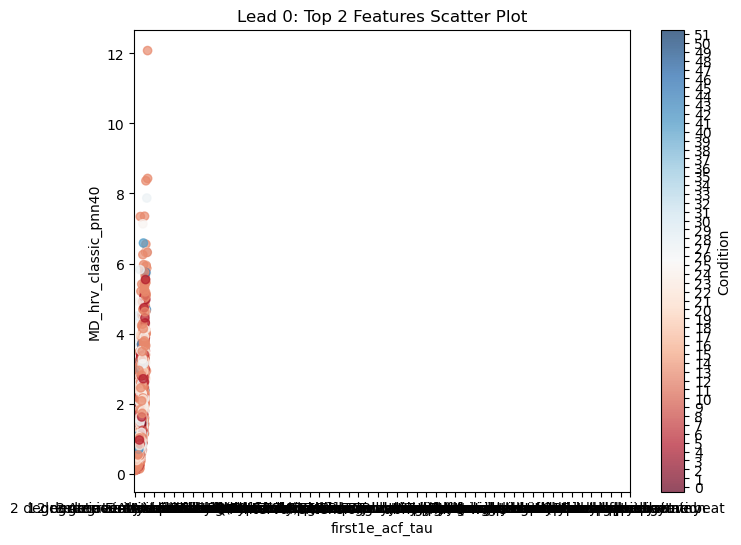

Results for Lead 1
Accuracy: 0.8628


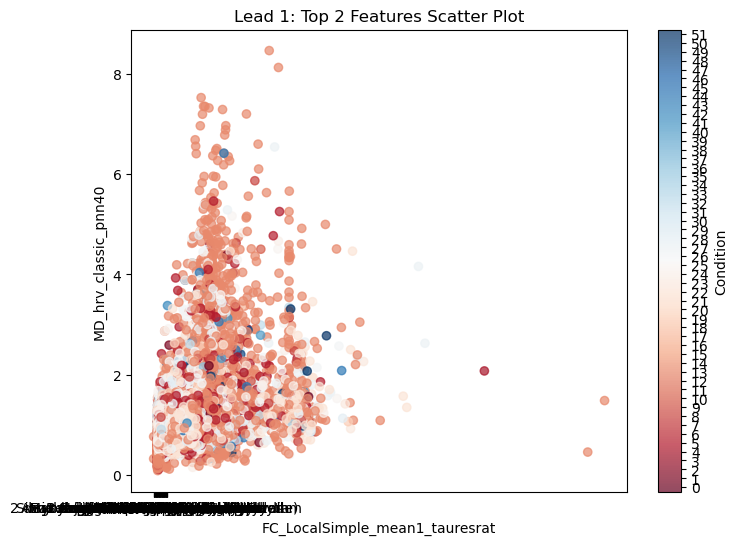

Results for Lead 2
Accuracy: 0.8537


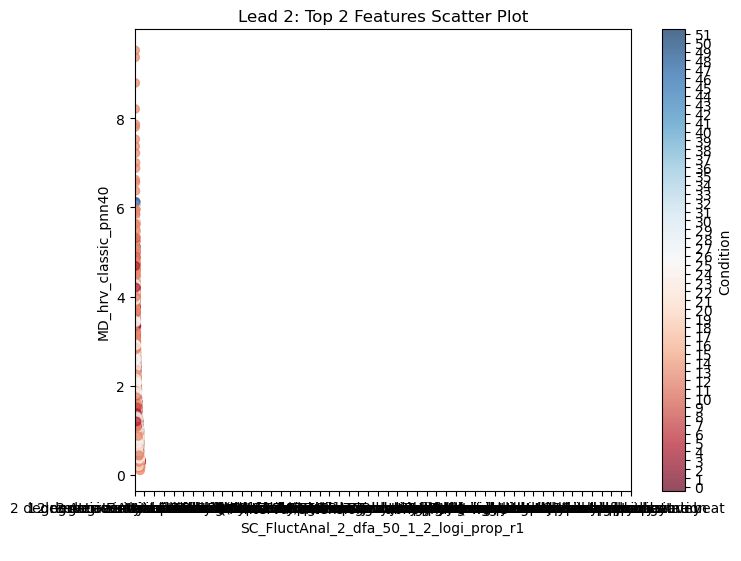

Results for Lead 3
Accuracy: 0.8682


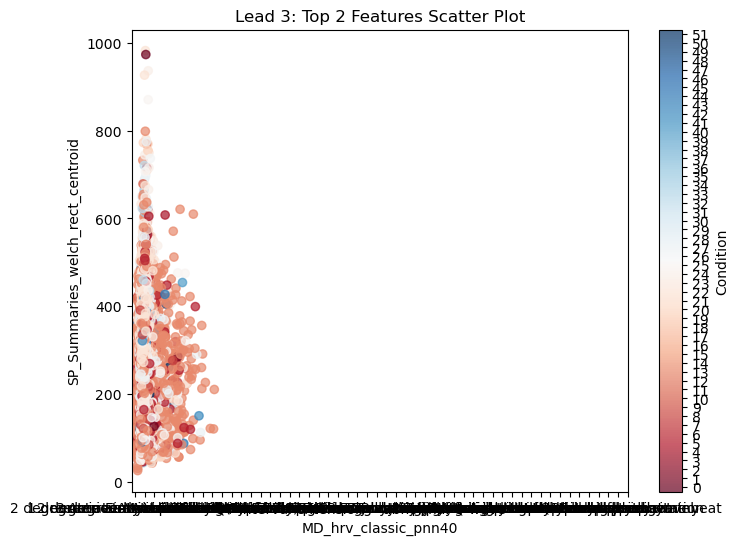

Results for Lead 4
Accuracy: 0.8530


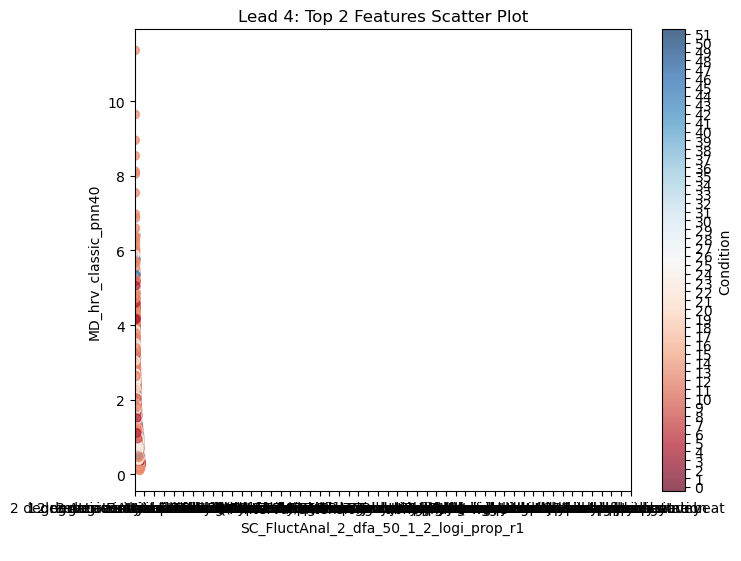

Results for Lead 5
Accuracy: 0.8608


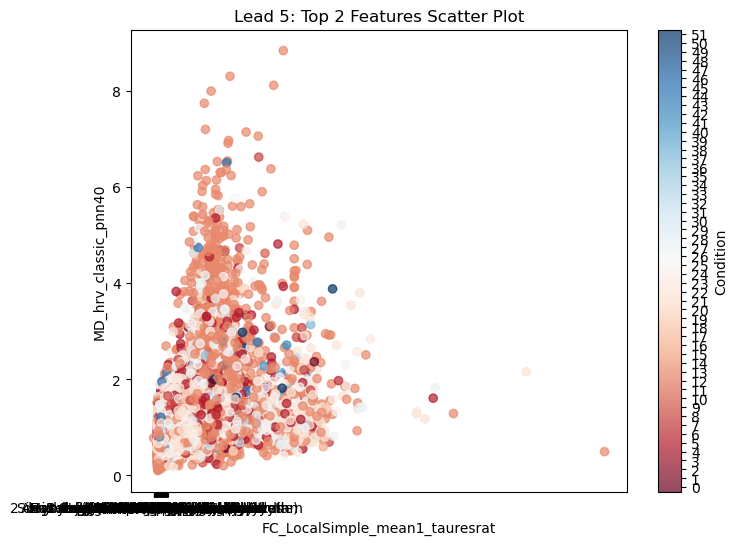

Results for Lead 6
Accuracy: 0.8504


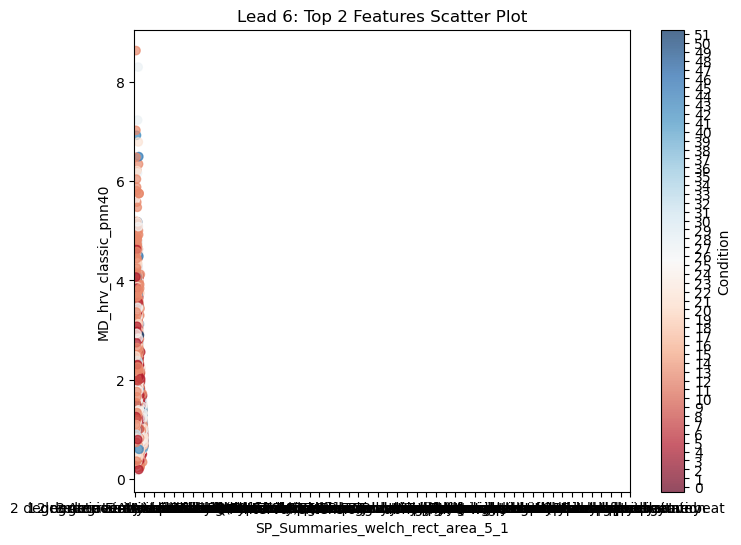

Results for Lead 7
Accuracy: 0.8540


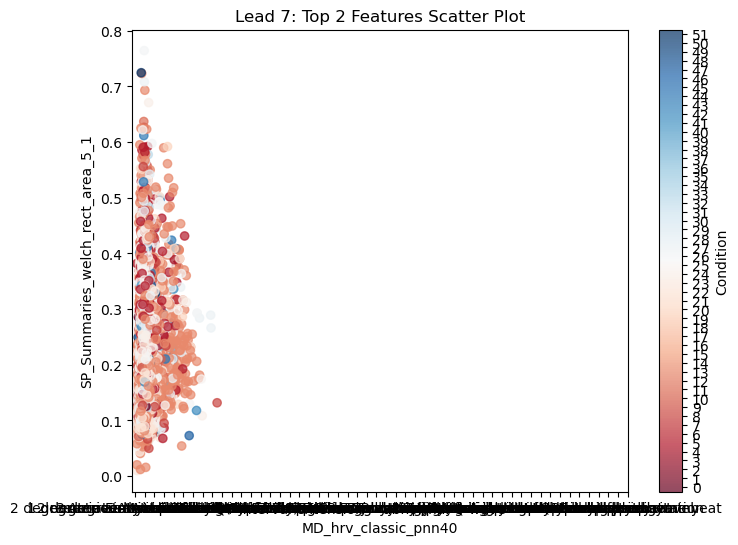

Results for Lead 8
Accuracy: 0.8561


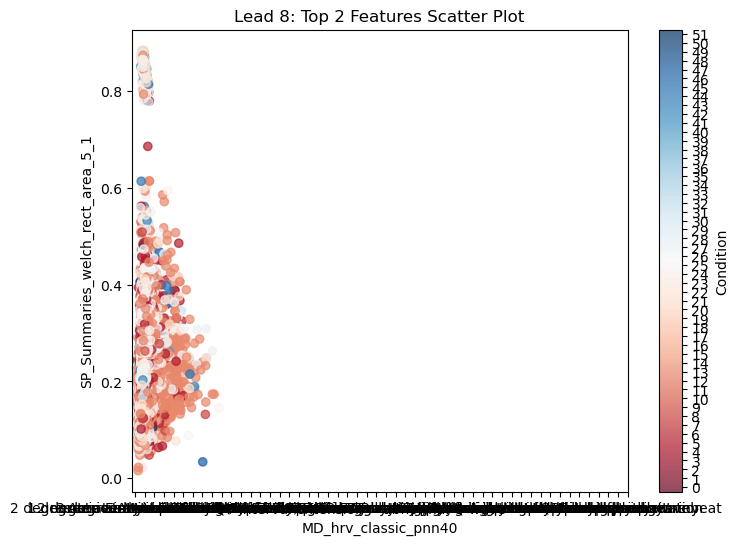

Results for Lead 9
Accuracy: 0.8475


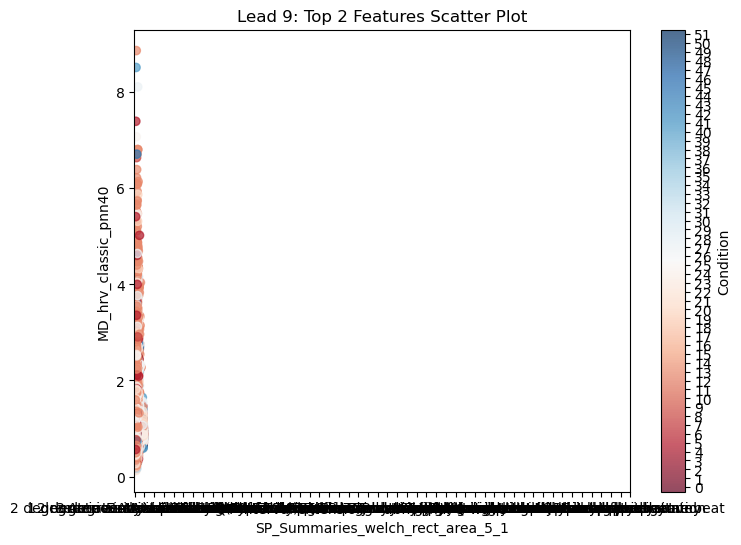

Results for Lead 10
Accuracy: 0.8508


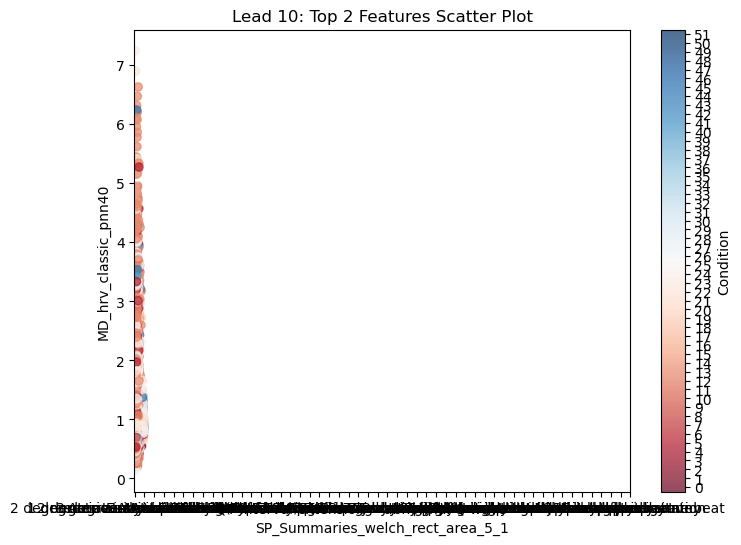

Results for Lead 11
Accuracy: 0.8476


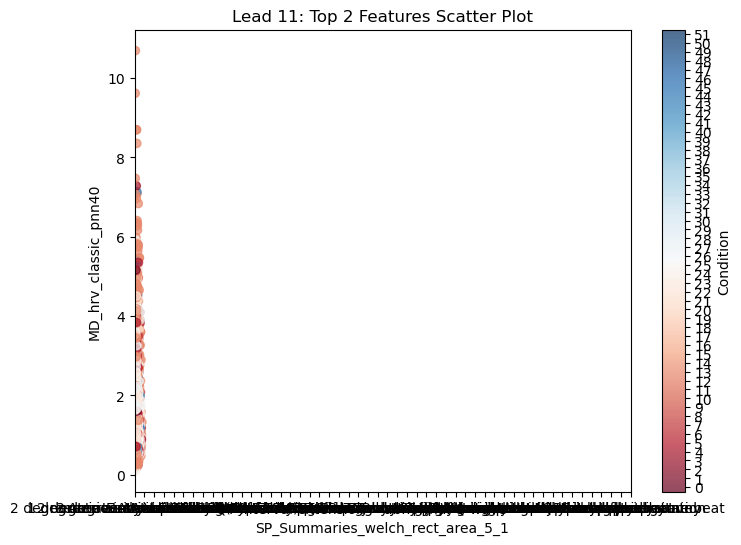

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each of the 12 ECG leads
for i in range(12):
    # Load the training and testing datasets for each lead
    train_df = pd.read_csv(f'/Users/matildacotton/Desktop/semester_2_2024/topics/data/training-hctsa-catch22-features-lead-{i}.csv')
    test_df = pd.read_csv(f'/Users/matildacotton/Desktop/semester_2_2024/topics/data/validating-hctsa-catch22-features-lead-{i}.csv')

    # Split features (X) and target (y)
    X_train = train_df.drop('Condition', axis=1).values
    y_train = train_df['Condition'].values  

    X_test = test_df.drop('Condition', axis=1).values  
    y_test = test_df['Condition'].values 

    # Initialize and train the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Display the accuracy for the current lead
    print(f"Results for Lead {i}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Get feature importances from the classifier
    importances = clf.feature_importances_

    # Sort features by importance and select the top two
    indices = np.argsort(importances)[-2:]
    top_two_features = train_df.columns[indices]

    # Plot the top two features
    plt.figure(figsize=(8, 6))
    # Scatter plot, with class labels (y_train) determining the color (0 -> red, 1 -> blue)
    plt.scatter(x, y, c='green')

    plt.scatter(train_df.iloc[:, indices[0]], train_df.iloc[:, indices[1]], c=['red' if label == 0 else 'blue' for label in y_train], alpha=0.7)

    plt.xlabel(top_two_features[0])
    plt.ylabel(top_two_features[1])
    plt.title(f'Lead {i}: Top 2 Features Scatter Plot')
    plt.show()


    #plot two features with different colours to see the separation
